In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={'figure.figsize': [14, 8]})

import pickle

from mcpt.contrastlearning import Trainer

In [2]:
with open('data/ContrastRandomSampling/metrics_contrast.pickle', 'rb') as f:
    metrics_contrast = pickle.load(f)
with open('data/ContrastRandomSampling/metrics_random.pickle', 'rb') as f:
    metrics_random = pickle.load(f)
print(metrics_random[0].keys())

dict_keys(['BCEloss', 'train_predictions', 'train_microf1', 'train_macrof1', 'predictions', 'microf1', 'macrof1', 'KNNlogits', 'WCSL'])


In [3]:
microf1s = pd.DataFrame({
    'last_random': [m['microf1'][-1] for m in metrics_random],
    'last_contrast': [m['microf1'][-1] for m in metrics_contrast],
    'max_random': [np.max(m['microf1']) for m in metrics_random],
    'max_contrast': [np.max(m['microf1']) for m in metrics_contrast],
})
microf1s.head(3)

,last_random,last_contrast,max_random,max_contrast
0,0.680683,0.690196,0.692410,0.699338
1,0.690571,0.704961,0.706964,0.705111
2,0.682540,0.696335,0.700000,0.701571


<AxesSubplot: >

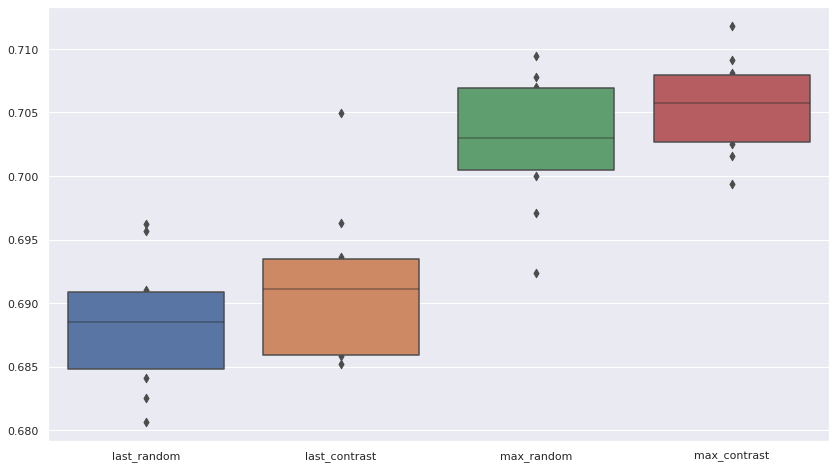

In [4]:
sns.boxenplot(microf1s)

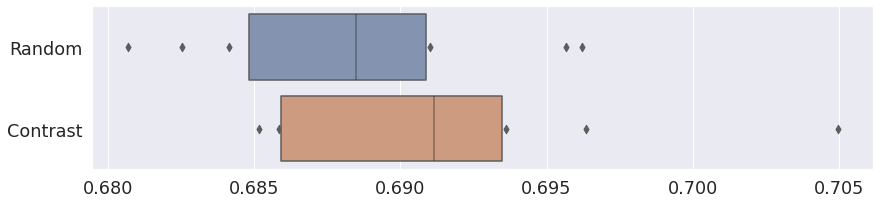

In [11]:
sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(14, 3))
sns.boxenplot(
    microf1s[['last_random', 'last_contrast']].rename(columns={'last_random': 'Random', 'last_contrast': 'Contrast'}),
    palette={'Random': '#8494b0', 'Contrast': '#cc9b80'},
    saturation=1.,
    orient='h',
    ax=ax
)
#plt.savefig('figures/contrast_vs_random.pdf')
sns.set(font_scale=1)

In [6]:
microf1s.mean()

last_random      0.688462
last_contrast    0.691315
max_random       0.702849
max_contrast     0.705475
dtype: float64

In [7]:
microf1s.median()

last_random      0.688483
last_contrast    0.691151
max_random       0.702989
max_contrast     0.705725
dtype: float64

In [8]:
microf1s.std()

last_random      0.005178
last_contrast    0.006205
max_random       0.005295
max_contrast     0.003819
dtype: float64

In [9]:
BCElosses = pd.DataFrame({
    'last_random': [float(m['BCEloss'][-1]) for m in metrics_random],
    'last_contrast': [float(m['BCEloss'][-1]) for m in metrics_contrast],
    'min_random': [np.min(m['BCEloss']) for m in metrics_random],
    'min_contrast': [np.min(m['BCEloss']) for m in metrics_contrast],
})
BCElosses.head(3)

,last_random,last_contrast,min_random,min_contrast
0,0.055920,0.046011,0.055920,0.046011
1,0.051195,0.043653,0.051195,0.043653
2,0.051444,0.043660,0.051444,0.043660


<AxesSubplot: >

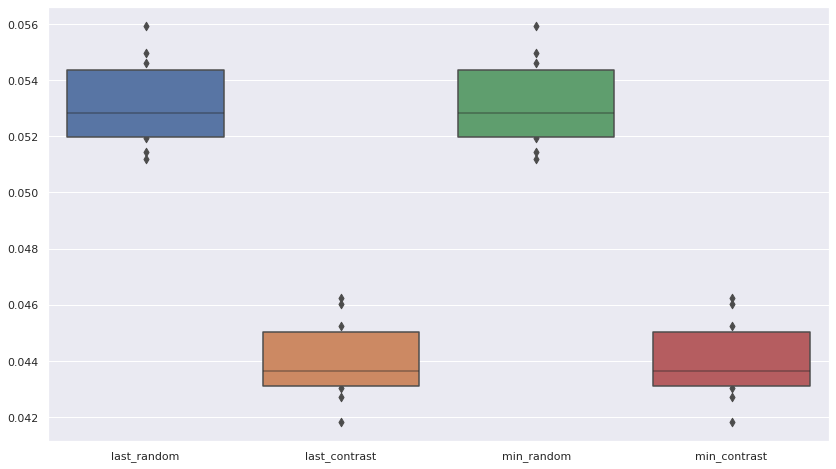

In [10]:
sns.boxenplot(BCElosses)

In [11]:
BCElosses.std()

last_random      0.001599
last_contrast    0.001441
min_random       0.001599
min_contrast     0.001441
dtype: float64

<AxesSubplot: >

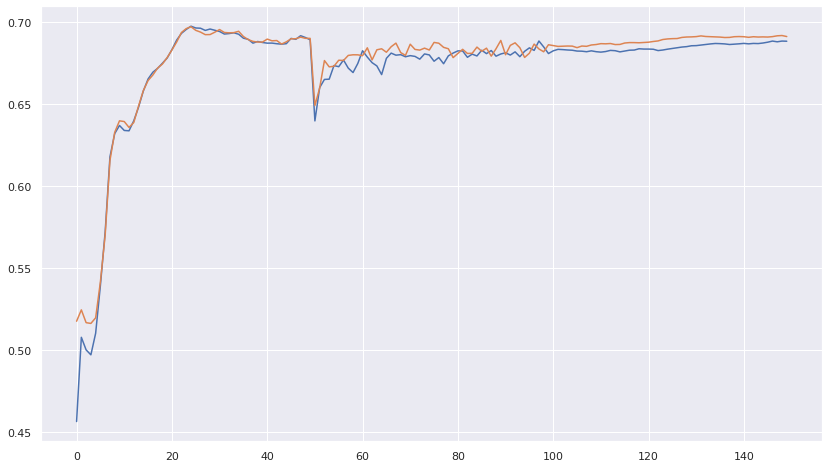

In [12]:
avg_random_microf1s = np.mean([m['microf1'] for m in metrics_random], axis=0)
avg_contrast_microf1s = np.mean([m['microf1'] for m in metrics_contrast], axis=0)
sns.lineplot(x=np.arange(len(avg_random_microf1s)), y=avg_random_microf1s)
sns.lineplot(x=np.arange(len(avg_contrast_microf1s)), y=avg_contrast_microf1s)

<AxesSubplot: >

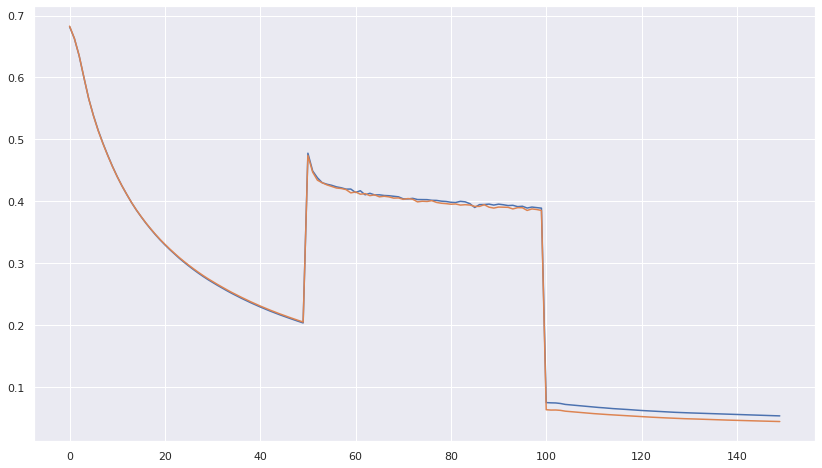

In [13]:
avg_random_BCE = np.mean([m['BCEloss'] for m in metrics_random], axis=0)
avg_contrast_BCE = np.mean([m['BCEloss'] for m in metrics_contrast], axis=0)
sns.lineplot(x=np.arange(len(avg_random_BCE)), y=avg_random_BCE)
sns.lineplot(x=np.arange(len(avg_contrast_BCE)), y=avg_contrast_BCE)